Baran Onalan

CPSC 5305

Final Project Submission

11/30/2023

In [6]:
# For reading CSV.
import os

# For plotting.
import numpy as np
import pandas as pd

## For Data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

## For Pre-processing.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## For Linear Regression.
from sklearn.linear_model import LinearRegression

To find the file in use here from GitHub go to: 

https://github.com/onalanb/Measuring-Global-Happiness

/Data/2021.csv

In [7]:
data = pd.read_csv("C://Users//baran//OneDrive//Coding Repository//Measuring Global Happiness//Data//2021.csv")
data

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


The following variables can be dropped from the data set since they seem to be redundant or unnecessary for calculating/predicting the happiness scores.

In [8]:
data.drop(['Country', 'Region', 'Ladder score in Dystopia', 'Standard error of ladder score', 'upperwhisker', 
           'lowerwhisker', 'Explained by: Log GDP per capita', 'Explained by: Social support',
           'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
           'Explained by: Generosity', 'Explained by: Perceptions of corruption', 
           'Dystopia + residual'], axis = 1, inplace = True)

# Let's visualize the data now

Lets try to see the corrrlations between the different features using the heat map.

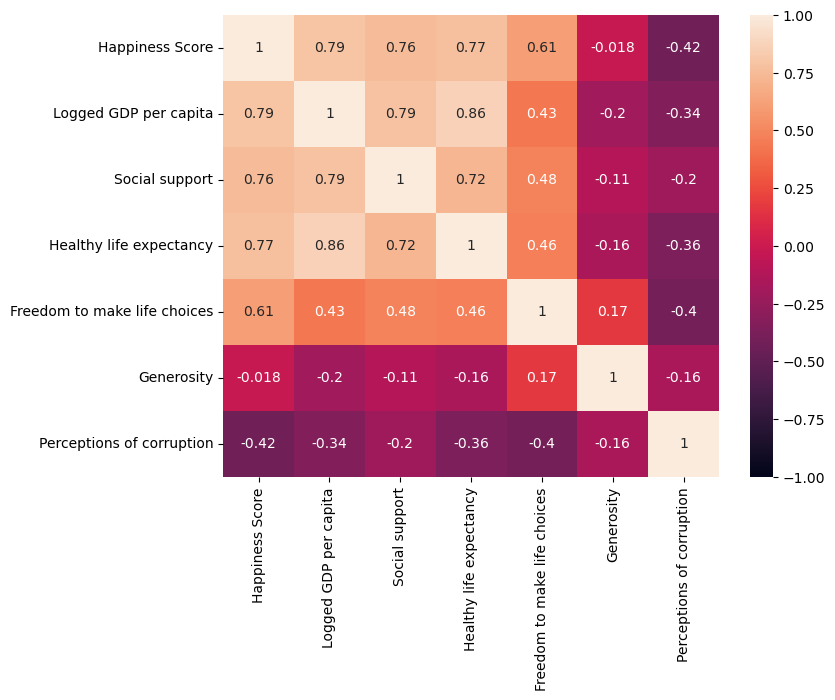

In [9]:
plt.figure(figsize = (8, 6))
sns.heatmap(data.corr(), annot = True, vmin = -1.0, vmax = 1.0)
plt.show()

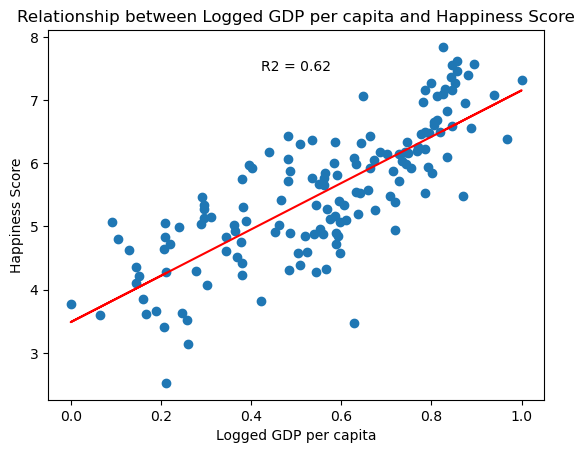

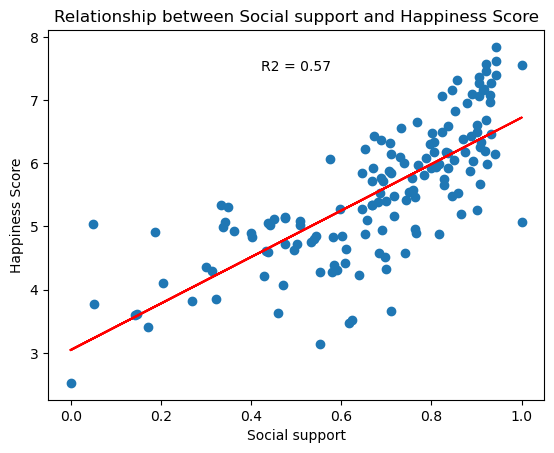

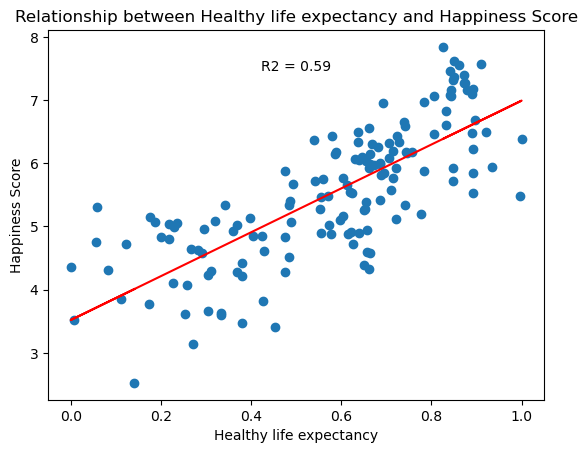

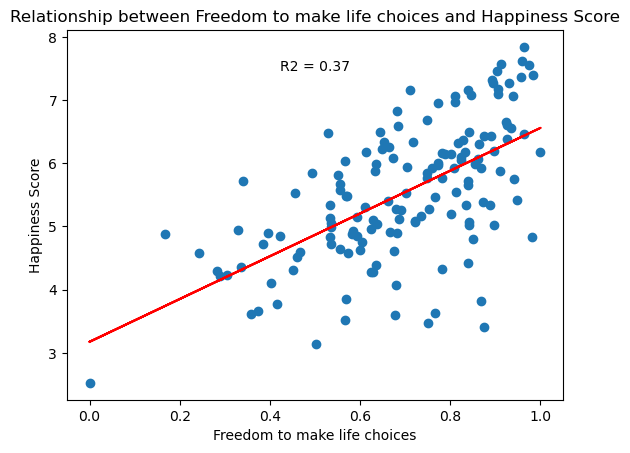

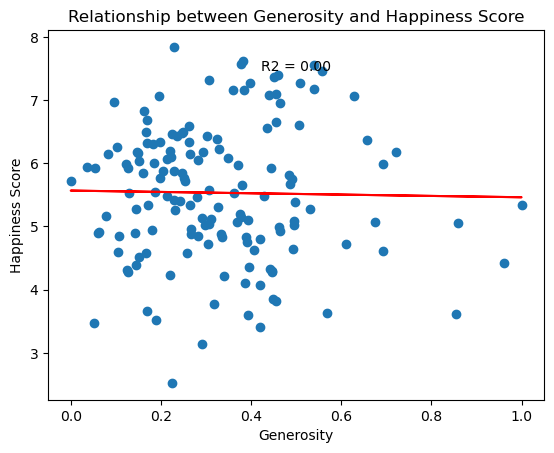

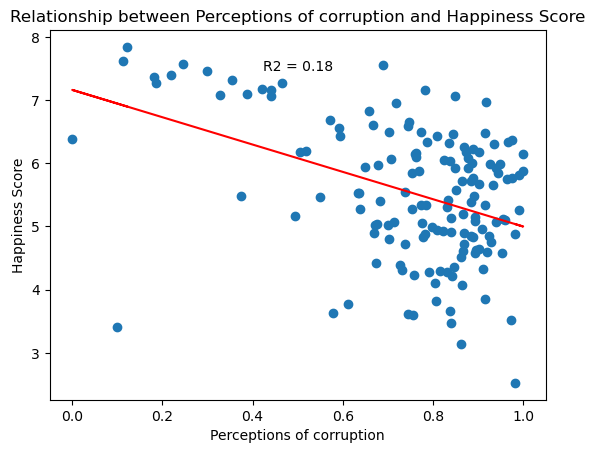

In [10]:
# Data set only containing the Happiness Score.
y = data['Happiness Score']
# Data set containing everything other than the Happiness Score.
x = data.drop('Happiness Score', axis = 1)
# Scaling the values in the x data set.
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Loop to iterate over all features and plot the linear regression line over the data
for i in range(len(x.columns)):
    # Creating the scatter plot
    plt.scatter(x.iloc[:, i], y)
    feature_name = x.columns[i]
    plt.xlabel(feature_name)
    plt.ylabel("Happiness Score")
    plt.title("Relationship between " + feature_name + " and Happiness Score")

    # Fitting the linear regression line
    model = LinearRegression()
    x_feature = x.iloc[:, i].values.reshape(-1, 1) 
    model.fit(x_feature, y)
    y_pred = model.predict(x_feature)

    # Plotting the linear regression line
    plt.plot(x.iloc[:, i], y_pred, color = 'r')

    # Calculating the R squared value
    r_squared = model.score(x_feature, y)
    # Placing the text at the top middle of the graph and centering it.
    plt.text(0.5, 0.9, f'R2 = {r_squared:.2f}', ha = 'center', va = 'center', transform = plt.gca().transAxes, fontsize = 10)

    plt.show()

I decided to remove 'Generosity' and 'Perceptions of corruption' from the data set as it had very low or negligible correlation and impact on the target variable of happiness score.

In [11]:
data.drop(['Generosity', 'Perceptions of corruption'], axis = 1, inplace = True)

# Preprocessing

Making sure there is no data missing from the data set.

In [12]:
data.isnull().sum()

Happiness Score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
dtype: int64

Making sure there is no mismatch of data types.

In [13]:
data.dtypes

Happiness Score                 float64
Logged GDP per capita           float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
dtype: object

This table should contain only the "Happiness Score"

In [14]:
y

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Happiness Score, Length: 149, dtype: float64

This table should contain everything except the "Happiness Score"

In [15]:
x

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354
1,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186
2,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041
3,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615
4,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716
...,...,...,...,...,...,...
144,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995
145,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973
146,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183
147,0.260974,0.551923,0.271220,0.501701,0.290361,0.862310


In [16]:
# Creating the variables to train the model with the data set.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Training our model

In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [18]:
regression = model.score(x_test, y_test)
print(f"Regression R2: {regression}")

Regression R2: 0.7508398496398963


This is an R2 value is shows that the data around the regression line is a close fit to the regression line

# Graph of the model for UNSEEN data

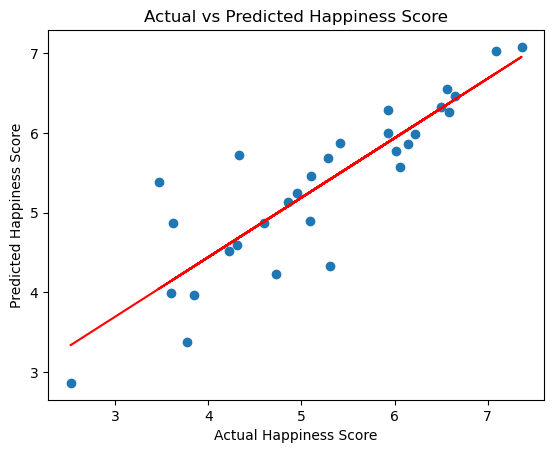

In [19]:
# Obtaining the predictions
y_pred = model.predict(x_test)

# Creating the scatter plot between the actual values and the predicted values for unseen data
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Score")

regression_model = LinearRegression()
regression_model.fit(y_test.values.reshape(-1, 1), y_pred)
y_pred_regression = regression_model.predict(y_test.values.reshape(-1, 1))

# Plotting the regression line
plt.plot(y_test, y_pred_regression, color = 'r')

plt.show()

The graph above shows the comparison between the actual happiness score values 'y_test' against the predicted values 'y_pred' obtained from the model on the test data set 'x_test'

We are doing this to better asses how well the model generalizes new and unseen data.

# Graph of the model for ENTIRE DATASET used from training and testing

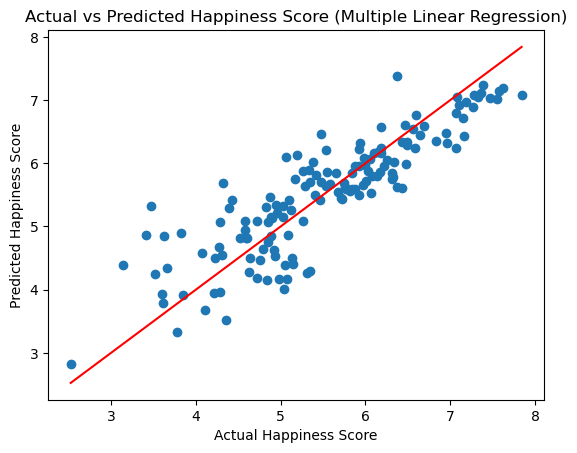

In [20]:
# Initializing and fitting the model
model = LinearRegression()
model.fit(x, y)

# Prediction on the entire dataset
y_pred = model.predict(x)

# Creating the scatter plot between the actual values and the predicted values from the entire data set
plt.scatter(y, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Score (Multiple Linear Regression)")

# Plotting the regression line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'r')

# Showing the plot
plt.show()